# Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle
## (d'après l'étude de William Playfair) 

Importation de la librairie et chargement des données.

In [62]:
import pandas as pd
playfair = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv")

On regarde le début et la fin du dataframe pour avoir un premier sentiment sur les données

In [63]:
playfair.head()


Unnamed: 0  Year  Wheat  Wages
0           1  1565   41.0   5.00
1           2  1570   45.0   5.05
2           3  1575   42.0   5.08
3           4  1580   49.0   5.12
4           5  1585   41.5   5.15

In [64]:
playfair.tail()

Unnamed: 0  Year  Wheat  Wages
48          49  1805   81.0   29.5
49          50  1810   99.0   30.0
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

Comme il n'y a pas beaucoup de données on peut vérifier la qualité par de simples graphiques.

On importe matplotlib et on visualise les deux variables principales; on ne constate pas de valeurs anormales. La variabilité du prix du blé est plus grande que celle des salaires. Cela parait normal. 

In [65]:
import matplotlib.pyplot as plt


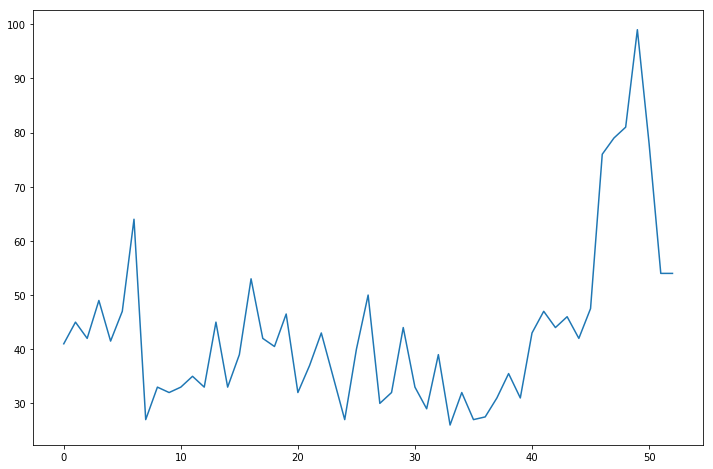

In [66]:
plt.rcParams["figure.figsize"] = (12, 8) # afin que les graphiques apparaissent en grand.
plt.plot(playfair['Wheat']) 

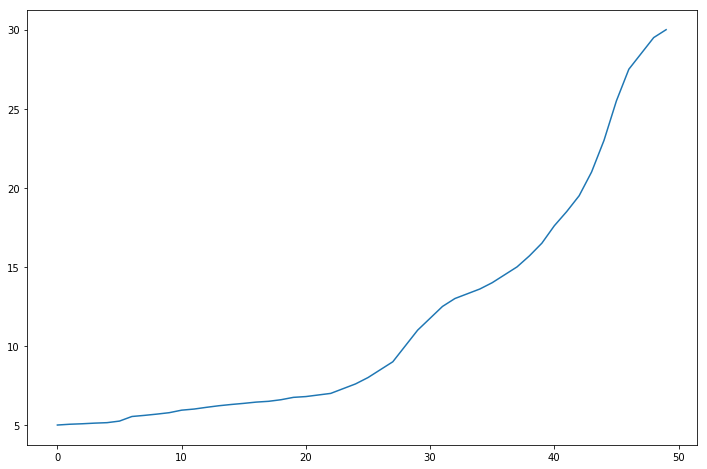

In [67]:
plt.rcParams["figure.figsize"] = (12, 8) # afin que les graphiques apparaissent en grand.
plt.plot(playfair['Wages'])

On prend l'année comme index. 

In [68]:
playfair.set_index('Year'); # ; suppress output

On n'a plus besoin de la colonne qui numérote les observations

In [69]:
playfair=playfair.drop(columns='Unnamed: 0')

On vérifie le type des variables et le nombre de variables non nulles. Les 3 NaN du salaire correspondent aux trois dernières observations.

In [70]:
playfair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Year     53 non-null int64
Wheat    53 non-null float64
Wages    50 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


Les années vont de 5 en 5 sauf la dernière qui a les mêmes valeurs que l'avant dernière. On élimine donc la dernière observation qui n'apporte rien. 

In [71]:
playfair=playfair[:-1]


 On vérifie que les années vont bien de de 5 en 5 et qu'il y a pas d'anomalies

In [72]:
playfair['Year'].tolist()==list(range(1565,1825,5))

True

Voici le graphique, il est moins beau que celui crée par William Playfair car je ne maitrise pas matplotlib. Tout d'abord, je ne comprends pas pourquoi le 'plot' et 'fill_between' exécutés après le 'bar' ne recouvrent pas le bas des barres. En outre. D'autre part, il n'y a pas dans librairie de matplotlib la possibilité native de faire apparaitre un gradient dans les barres comme c'est sur le graphique de William Playfair. Enfin, je ne connais pas bien pandas et je ne sais pas s'il est possible de simplifier le code en créant le graphique directement depuis pandas.  

In [73]:
# on définit ces variables pour alléger l'écriture par la suite
t = playfair['Year']
wheat = playfair['Wheat']
wages = playfair['Wages']

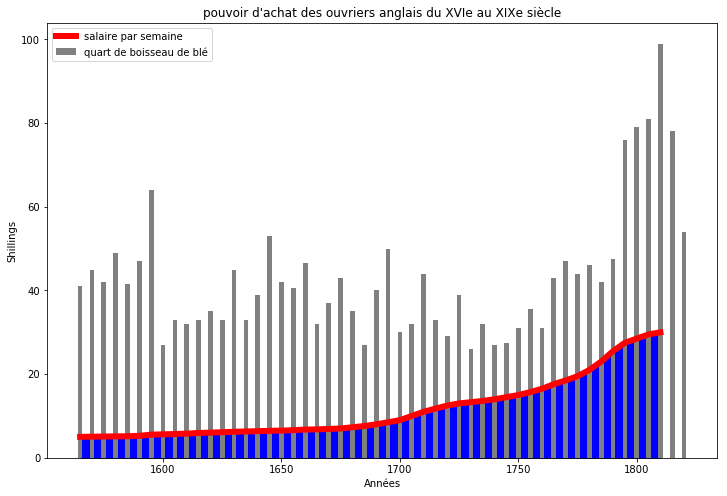

In [74]:
plt.rcParams["figure.figsize"] = (12, 8) # afin que les graphiques apparaissent en grand.
plt.bar(t,wheat,width=2,label='quart de boisseau de blé',color='grey')
plt.plot(t,wages,label='salaire par semaine',color='red', linewidth=6)
plt.fill_between(t,wages,color='blue') # color='blue' donne une bug sur le graphe
plt.xlabel('Années')
plt.ylabel('Shillings')
plt.legend()
plt.title('pouvoir d\'achat des ouvriers anglais du XVIe au XIXe siècle')
plt.show()

Ci dessous, le graphique avec deux échelles séparées. 

Remarque: j'ai repris et adapté un exemple trouvé sur Internet.

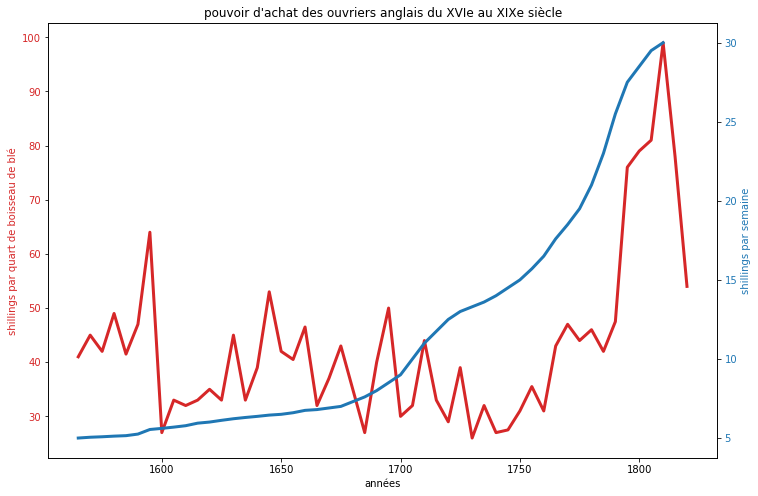

In [75]:
plt.rcParams["figure.figsize"] = (12, 8) # afin que les graphiques apparaissent en grand.
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('années')
ax1.set_ylabel('shillings par quart de boisseau de blé', color=color)
ax1.plot(t, wheat, color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # pour partager le même axe des x

color = 'tab:blue'
ax2.set_ylabel('shillings par semaine', color=color)  # deuxième label sur l'axe des y
ax2.plot(t, wages, color=color,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('pouvoir d\'achat des ouvriers anglais du XVIe au XIXe siècle')
plt.show()

On va présenter en kg la quantité de blé que un ouvrier peut acheter par semaine avec son évolution au cours des années (formule : facteur_de_conversion_en_kg_du_boisseau*(salaire / prix_du_boisseau). Définissons cela comme le pouvoir d'achat. On voit que cette évolution est plus ou moins croissante, sauf à la fin de la courbe.

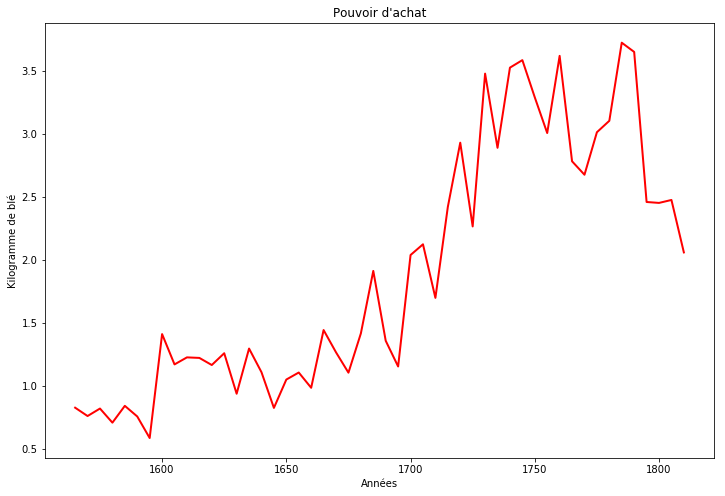

In [76]:
plt.rcParams["figure.figsize"] = (12, 8) # afin que les graphiques apparaissent en grand.
plt.plot(t,6.8*(wages/wheat),color='red', linewidth=2)
plt.title('Pouvoir d\'achat')
plt.xlabel('Années')
plt.ylabel('Kilogramme de blé')
plt.show()

On fait un nuage de points pour explorer un lien entre les variables salaire et prix du blé. On fait apparaitre l'année près de chaque points

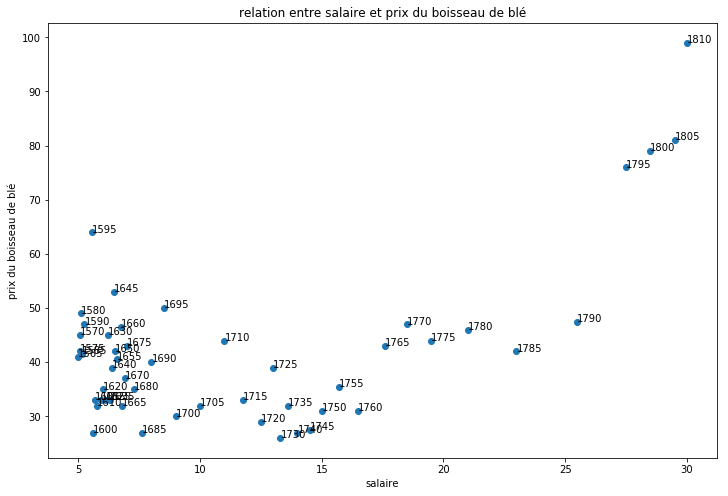

In [77]:
plt.rcParams["figure.figsize"] = (12, 8) # afin que les graphiques apparaissent en grand.
plt.scatter(wages[:-2], wheat[:-2])
for i, txt in enumerate(t[:-2]):
    plt.annotate(txt, (wages[i], wheat[i]))
plt.title('relation entre salaire et prix du boisseau de blé')
plt.xlabel('salaire')
plt.ylabel('prix du boisseau de blé')
plt.show()

On pourrait penser à un lien entre salaire et prix du blé. Si on prend toutes les observations complètes (sans NaN) on a une correlation significative positive entre salaire et prix du blé.

Cependant lorsque l'on écarte les 4 dernières observations complètes ce lien disparait. Voir ci-dessous la p value de la deuxième régression linéaire. 

Si on écarte toujours les 4 dernières observations, on observe une relative stabilité générale du prix du boisseau de blé (de 30 à 50) et au cours des années un glissement des salaires le long de l'axe des abscisses.  

In [78]:
from scipy import stats
_, _, r_value, p_value, _ = stats.linregress(wages[:-2], wheat[:-2]) # 2 dernières valeurs de wages NaN
print( "%.2f" % r_value,"%.4f" % p_value)
_, _, r_value, p_value, _ = stats.linregress(wages[:-6], wheat[:-6]) # en écartant les 6 dernières valeurs
print( "%.2f" % r_value,"%.4f" % p_value)

0.58 0.0000
-0.03 0.8648


## Conclusion

On remarque que le pouvoir d'achat de l'ouvrier, compté en kg de blé (denré principale de l'époque) a considérablement augmenté (par un facteur 3) entre le XVIe au XIXe siècle. L'essentiel de cette progression est entre les années 1650 et 1750. Enfin cette progression stagne entre les années 1795 et 1810 où le prix du blé augmente. Cela est probablement causé par la révolution française et les guerres napoléoniennes. 

Remarque: le graphique indiquant l'évolution du pouvoir d'achat est plus intéressant que celui du nuage de points. Cependant, l'examen du nuage de point permet d'écarter une corrélation entre les variables salaire et prix du blé.